<a href="https://colab.research.google.com/github/arthurnamz/Neural-Network/blob/main/%5BCODATA_RDA_datatrieste%5D_MNIST_MLP_rlang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset classification

## Keras Installation (again) 😀

In [1]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [2]:
library(keras)

## Load and prepare the dataset

In [3]:
#load MNIST, split into train and test sets
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

Loaded Tensorflow version 2.8.2



Let's inspect the dataset content. 

In [4]:
dim(x_train)

[1] 60000    28    28

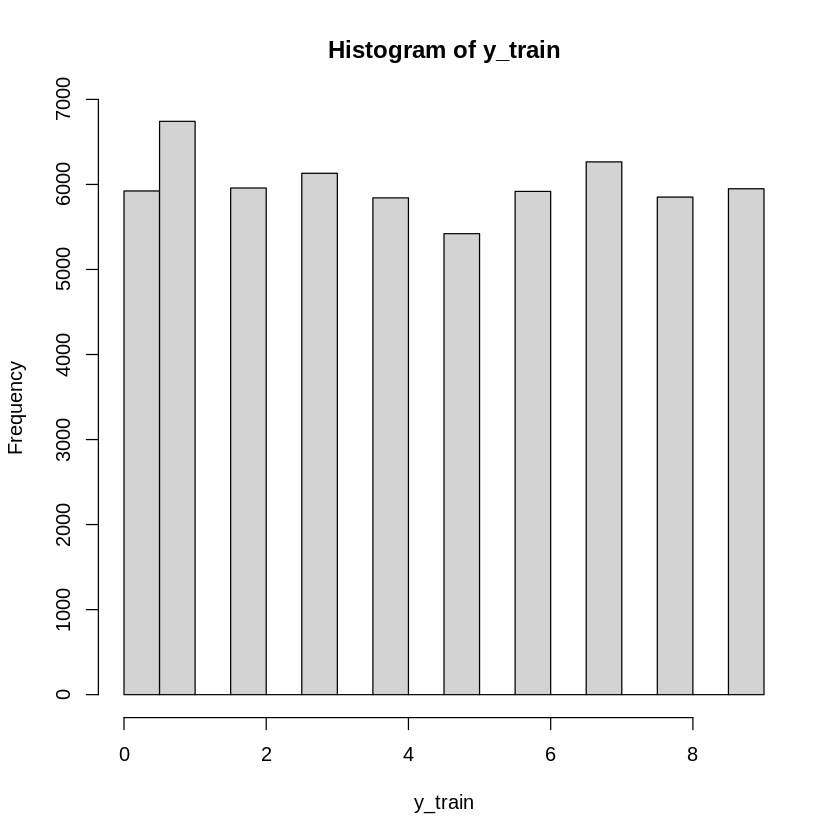

In [5]:
hist(y_train)

In [6]:
dim(x_test)

[1] 10000    28    28

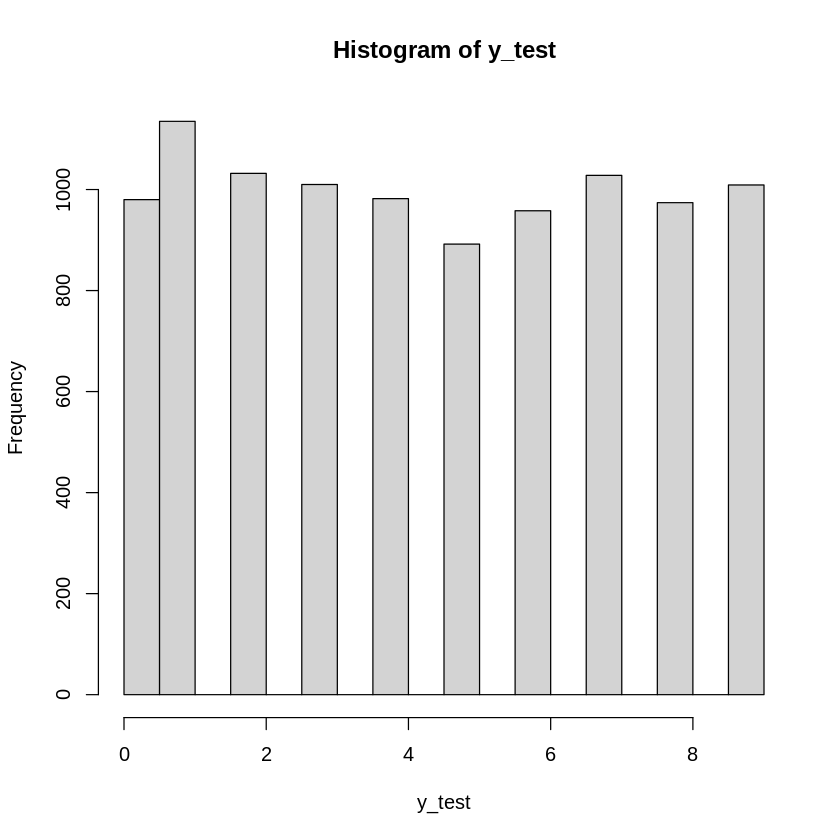

In [7]:
hist(y_test)

Let's inspect what the data points look like. 
This dataset stores numbers in a reverse way and upside-down. 😆

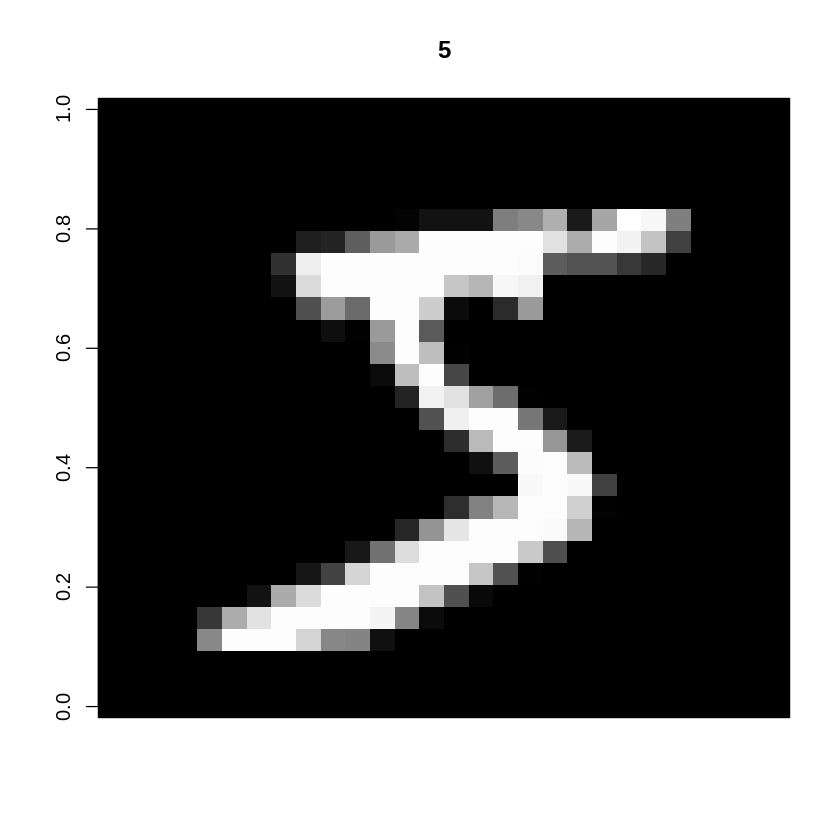

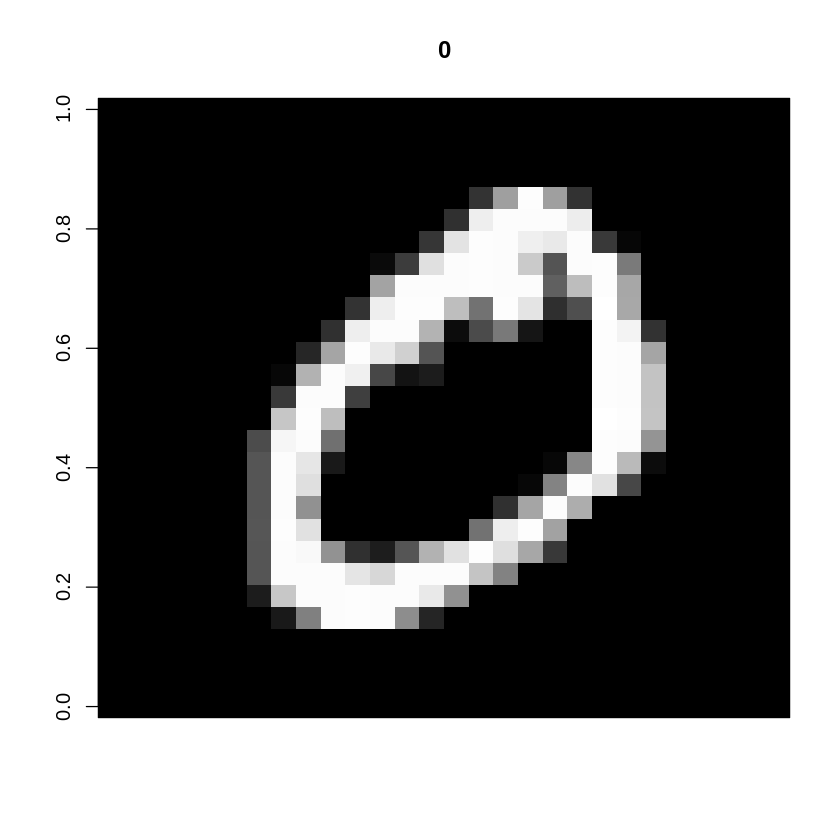

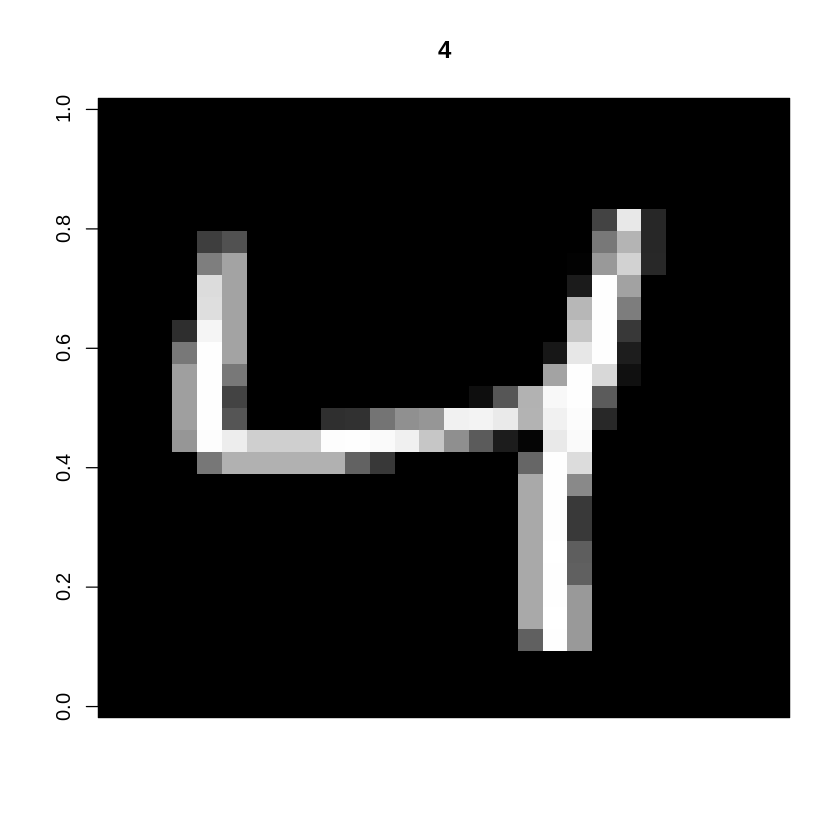

In [8]:
for (idx in 1:3) { 
    im <- x_train[idx,,]
    im <- t(apply(im, 2, rev)) 
    image(im, col=gray((0:255)/255), xaxt='n', main=paste(y_train[idx]))
}

In order to feed our neural network we will transform the 28x28 image on a list of 784 pixels.

In [9]:
# reshape: vectorize
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

In [10]:
dim(x_train)

[1] 60000   784

We are performing a classification task, so we need to transform our target variable to a category (this is very important). We are using the [one-hot encoding technique](https://en.wikipedia.org/wiki/One-hot).

In [11]:
y_train <- to_categorical(y_train, 10); #60000 x 10
y_test <- to_categorical(y_test, 10); #10000 x 10

In [12]:
dim(y_train)
head(y_train)

[1] 60000    10

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


Now we will create a simple NN model to do the classification.

In [13]:
#initialize empty model
model <- keras_model_sequential() 

#define model by a sequence of layers
model %>% 
  #layer 1: fully connected, 8 hidden units, sigmoid nonlinearity
  layer_dense(units = 8, activation = 'sigmoid', input_shape = c(784)) %>%
  layer_dense(units = 10, activation = 'softmax')

Model summary: Model has ~6,300 parameters, most of them in the first layer

In [14]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 8)                       6280        
 dense (Dense)                      (None, 10)                      90          
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
________________________________________________________________________________


Now we will build our computational graph.

In [15]:
# compile model
model %>% compile(
  loss = 'mse',
  optimizer = "sgd", 
  metrics = c('accuracy')
)

Now is the training part

In [20]:
history <- model %>% fit(
  x_train, y_train, 
  #5 epochs
  epochs = 50
)

Let's take a look at the learning curve of our NN trainning. 

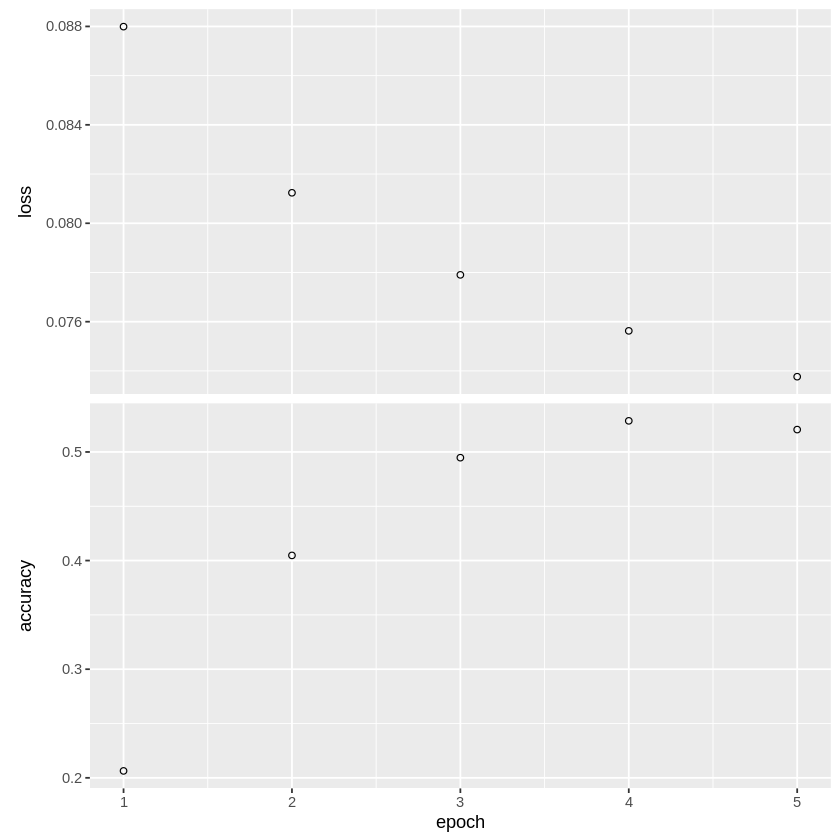

In [17]:
plot(history)

Now it is the time to check how good our model is against data it has never seen before.

In [18]:
model %>% evaluate(x_test, y_test)

loss   accuracy 
0.07282911 0.51690000

base model, 5 epochs
accuracy ~0.5

Can we do better?

Try changing:
- architecture
    - add layers (deep)
    - add dropouts
- training
    - other optimizers (e.g., Adam, RMSProp)
    - more epochs



In [19]:
model %>% predict(x_test) %>% k_argmax()

tf.Tensor([7 6 1 ... 4 6 6], shape=(10000), dtype=int64)